In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pd.set_option('display.max_columns', None)

In [2]:
results = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/results/demand_initial_exploration-2020-02-24 05:18:05.717624+00:00.csv')
results

,Unnamed: 0,estimator,mean_fit_time,mean_score_time,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_r2,param_model__estimator__C,param_model__estimator__gamma,param_model__estimator__kernel,...,split3_test_neg_mean_squared_error,split3_test_r2,split4_test_neg_mean_absolute_error,split4_test_neg_mean_squared_error,split4_test_r2,std_fit_time,std_score_time,std_test_neg_mean_absolute_error,std_test_neg_mean_squared_error,std_test_r2
0,0,LinearRegression,56.996707,4.842231,-2249.335372,-9.444809e+06,0.806067,NaN,NaN,NaN,...,-1.003536e+07,0.780765,-2298.275317,-9.017679e+06,0.817995,17.734316,0.981903,109.220299,1.090730e+06,0.020443
1,0,Lasso,787.965765,3.130403,-2249.550207,-9.446957e+06,0.806002,NaN,NaN,NaN,...,-1.004728e+07,0.780504,-2302.218781,-9.053263e+06,0.817277,332.700820,0.157155,108.112348,1.071438e+06,0.020238
2,0,Ridge,26.992292,5.034224,-2252.232807,-9.444702e+06,0.806063,NaN,NaN,NaN,...,-1.003906e+07,0.780684,-2300.804194,-9.032139e+06,0.817704,9.415740,0.871968,109.267034,1.083271e+06,0.020347
3,0,ElasticNet,54.494704,6.134713,-4628.637693,-3.113923e+07,0.358835,NaN,NaN,NaN,...,-3.335338e+07,0.271343,-4858.006419,-3.390740e+07,0.315645,26.518079,1.729862,179.926168,2.263244e+06,0.058238
4,0,llars,46.851553,8.002740,-2333.308156,-1.016482e+07,0.791013,NaN,NaN,NaN,...,-1.082715e+07,0.763468,-2428.809045,-1.014376e+07,0.795266,12.670819,1.485592,106.811166,9.848922e+05,0.020813
5,0,ExtraTreesRegressor,9321.519582,58.062933,-1604.996093,-5.562580e+06,0.885874,NaN,NaN,NaN,...,-6.179342e+06,0.865003,-1656.081894,-5.124621e+06,0.896569,3182.768861,22.872692,154.351228,1.026941e+06,0.020196
6,0,RandomForestRegressor,16567.461127,13.988741,-1646.285410,-5.882619e+06,0.879219,NaN,NaN,NaN,...,-6.679994e+06,0.854065,-1701.495337,-5.486893e+06,0.889257,3411.965438,9.458353,161.751138,1.055074e+06,0.021330
7,0,AdaBoostRegressor,8897.550665,26.898186,-3544.486782,-1.855196e+07,0.617357,NaN,NaN,NaN,...,-1.946800e+07,0.574693,-3558.830299,-1.875836e+07,0.621397,3250.738747,12.953154,115.289427,1.177105e+06,0.037929
8,0,GradientBoostingRegressor,6417.616140,8.161521,-1833.616582,-6.744403e+06,0.861570,NaN,NaN,NaN,...,-7.336947e+06,0.839714,-1832.491068,-5.970233e+06,0.879501,2913.670794,2.420802,126.498676,1.063264e+06,0.020529
9,0,SVR,19170.822128,5221.664779,-5926.746661,-5.121717e+07,-0.053493,10.0,0.001,rbf,...,-5.088067e+07,-0.111573,-6033.620665,-5.192924e+07,-0.048095,6958.570408,1203.348787,104.987791,1.327976e+06,0.039792


In [3]:
results['mean_test_mean_absolute_error'] = abs(results['mean_test_neg_mean_absolute_error'])

[Text(0, 0, 'LinearRegression'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'ElasticNet'),
 Text(0, 0, 'llars'),
 Text(0, 0, 'ExtraTreesRegressor'),
 Text(0, 0, 'RandomForestRegressor'),
 Text(0, 0, 'AdaBoostRegressor'),
 Text(0, 0, 'GradientBoostingRegressor'),
 Text(0, 0, 'SVR'),
 Text(0, 0, 'KNeighborsRegressor')]

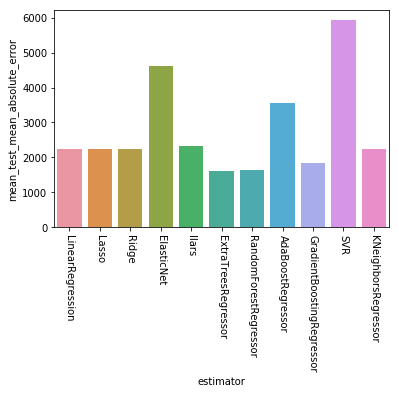

In [4]:
g = sns.barplot(data = results, x='estimator', y='mean_test_mean_absolute_error')
g.set_xticklabels(g.get_xticklabels(), rotation=-90)


[Text(0, 0, 'LinearRegression'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'ElasticNet'),
 Text(0, 0, 'llars'),
 Text(0, 0, 'ExtraTreesRegressor'),
 Text(0, 0, 'RandomForestRegressor'),
 Text(0, 0, 'AdaBoostRegressor'),
 Text(0, 0, 'GradientBoostingRegressor'),
 Text(0, 0, 'SVR'),
 Text(0, 0, 'KNeighborsRegressor')]

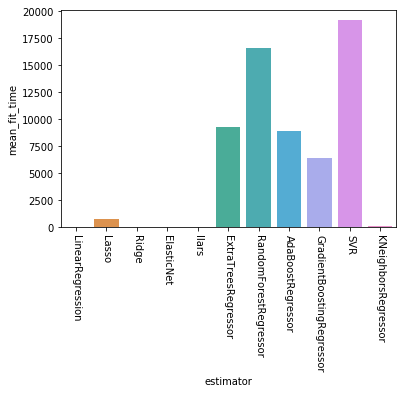

In [5]:
g = sns.barplot(data = results, x='estimator', y='mean_fit_time')
g.set_xticklabels(g.get_xticklabels(), rotation=-90)

[Text(0, 0, 'LinearRegression'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'ElasticNet'),
 Text(0, 0, 'llars'),
 Text(0, 0, 'ExtraTreesRegressor'),
 Text(0, 0, 'RandomForestRegressor'),
 Text(0, 0, 'AdaBoostRegressor'),
 Text(0, 0, 'GradientBoostingRegressor'),
 Text(0, 0, 'SVR'),
 Text(0, 0, 'KNeighborsRegressor')]

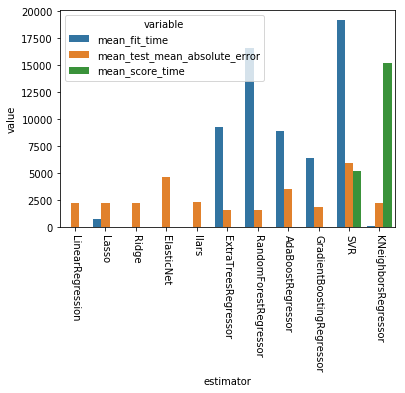

In [6]:
results_long = pd.melt(results, id_vars=['estimator'], value_vars=['mean_fit_time','mean_test_mean_absolute_error','mean_score_time'])
g = sns.barplot(data=results_long, hue='variable', y='value', x='estimator')
g.set_xticklabels(g.get_xticklabels(), rotation=-90)

## Visualise Predictions

In [7]:
import os.path
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '../../..'))
ROOT_DIR = os.path.join(os.path.dirname(os.path.realpath('__file__')), '')

from run.market_forecasting_comparison.munging.multi_step_forecasting_wrangling import multi_step_data_prep, get_hours_of_days_needed
# from run.market_forecasting_comparison.ML.EstimatorSelectionHelper import EstimatorSelectionHelper

import numpy as np

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit

In [14]:
models = {
#     'LinearRegression': LinearRegression(),
#     'Lasso': Lasso(),
#     'Ridge': Ridge(),
#     'ElasticNet': ElasticNet(),
#     'llars': LassoLars(),
#     'ExtraTreesRegressor': ExtraTreesRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
#     'AdaBoostRegressor': AdaBoostRegressor(),
#     'GradientBoostingRegressor': GradientBoostingRegressor(),
#     'SVR': SVR(),
#     "MLPRegressor": MLPRegressor(),
#     'KNeighborsRegressor': KNeighborsRegressor()
}

params = {
    'LinearRegression': {},
    'Lasso': {},
    'Ridge': {},
    'ElasticNet': {},
    'llars': {},
    'ExtraTreesRegressor': {'model__estimator__n_estimators': [32]},
    'RandomForestRegressor': {'model__estimator__n_estimators': [32]},
    'AdaBoostRegressor':  {'model__estimator__n_estimators': [32]},
    'GradientBoostingRegressor': {'model__estimator__n_estimators': [32], 'model__estimator__learning_rate': [0.8]},
    'SVR': [
        # {'model__estimator__kernel': ['linear'], 'model__estimator__C': [10]},
        {'model__estimator__kernel': ['rbf'], 'model__estimator__C': [10], 'model__estimator__gamma': [0.001]},
    ],
    'MLPRegressor': {"model__estimator__hidden_layer_sizes": [(1,), (50,)], "model__estimator__activation": ["tanh", "relu"], "model__estimator__solver": ["adam"], "model__estimator__alpha": [0.0005]},
    'KNeighborsRegressor': {'model__estimator__n_neighbors': [20]},
}

In [15]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, refit=True, scoring=None):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = MultiOutputRegressor(self.models[key])
            
            pipeline = self.make_pipeline(model)
            params = self.params[key]
            tscv = TimeSeriesSplit(n_splits=cv)

            gs = GridSearchCV(pipeline, params, cv=tscv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self):
        all_results = []
        for k in self.grid_searches:
            results = pd.DataFrame(self.grid_searches[k].cv_results_)
            results['estimator'] = k
            all_results.append(results)
        results_df = pd.concat(all_results)
        results_df = results_df.loc[:,~results_df.columns.str.contains('train')] 

        return results_df
    
    def make_pipeline(self, model):
        steps = list()
        steps.append(('standardize', StandardScaler()))
        steps.append(('normalize', MinMaxScaler()))
        steps.append(('model', model))
        # create pipeline
        pipeline = Pipeline(steps=steps)
        return pipeline


In [16]:
demand = pd.read_csv('{}/../data/capacity/demand.csv'.format(ROOT_DIR))

demand = demand[demand.time < "2018"]

demand = demand.drop(columns=['time', 'Unnamed: 0'])

prev_days_needed = get_hours_of_days_needed(days_wanted=[1, 2, 7, 30], hours_wanted=[28, 28, 28, 28, 28])
multi_step_dat = multi_step_data_prep(dat=demand, input_lags=prev_days_needed, outputs=24)

y = multi_step_dat.filter(like='value').values
X = multi_step_dat.filter(regex='^(?!.*value).*$').values.astype(np.float32)

helper1 = EstimatorSelectionHelper(models, params)
# helper1.fit(X, y, n_jobs=-1, cv=5, refit=False)
helper1.fit(X, y, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, refit=True, verbose=1)

res = helper1.score_summary()

# timezone = pytz.timezone("Europe/London")

# res.to_csv('{}/../data/results/demand_initial_exploration-{}.csv'.format(ROOT_DIR, datetime.now(tz=timezone)))


Running GridSearchCV for RandomForestRegressor.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 59.2min finished


In [17]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,estimator
0,2060.436918,1058.591821,1.66522,0.33634,32,{'model__estimator__n_estimators': 32},-1632.663069,-1338.372565,-1754.823346,-1806.411308,-1702.342111,-1646.92248,164.655397,1,RandomForestRegressor


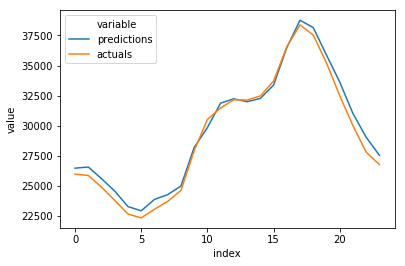

In [23]:
# helper1.grid_searches.best_estimator_
predictions = helper1.grid_searches['RandomForestRegressor'].best_estimator_.predict(X[-1].reshape(1,-1))
predictions = list(reversed(predictions.tolist()[0]))
answer = pd.DataFrame({'predictions':predictions,'actuals':list(reversed(y[-1]))}).reset_index().melt(id_vars=['index'])
sns.lineplot(data=answer, x='index',hue='variable',y='value')

answer.to_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/results/RandomForestRegressor_actual_vs_predicted.csv')

In [24]:
multi_step_dat.filter(regex='^(?!.*value).*$').columns

Index(['hour', 'month', 'dayofweek', 'dayofmonth', 'year', 'holiday', 'n-24',
       'n-25', 'n-26', 'n-27',
       ...
       'n-738', 'n-739', 'n-740', 'n-741', 'n-742', 'n-743', 'n-744', 'n-745',
       'n-746', 'n-747'],
      dtype='object', length=114)

In [29]:
li = []
for i in range(24):
    li.append(helper1.grid_searches['RandomForestRegressor'].best_estimator_.named_steps['model'].estimators_[i].coef_)
    
coefficients = pd.DataFrame(li, columns=multi_step_dat.filter(regex='^(?!.*value).*$').columns)
len(coefficients.columns)

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [30]:
coefficients_zero = coefficients.replace(0, np.nan).dropna(how="all", axis=1)
len(coefficients_zero.columns)


NameError: name 'coefficients' is not defined

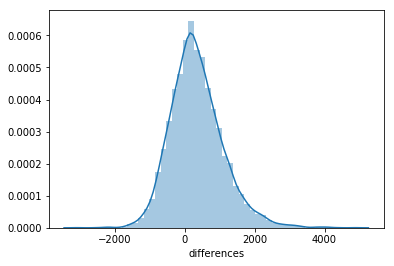

In [31]:
def predict_next_day(model, data):
    results = model.predict(data)
    return results


model = helper1.grid_searches['RandomForestRegressor'].best_estimator_

all_differences_list = []
for day in range(2,367):
    entire_data = X[-day].reshape(1,-1)
    predicted = predict_next_day(model, entire_data)
#     actual = demand.iloc[((day)*(24)):((day+1)*(24))].value
    actual = y[-day]
    differences = predicted[0] - actual
    all_differences_list.append(differences)
    
    
flattened_differences = np.concatenate(all_differences_list, axis=0 )
 
differences_dataframe = pd.DataFrame({'differences':flattened_differences})

sns.distplot(differences_dataframe.differences)

differences_dataframe.to_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/prediction_errors/one_model.csv')

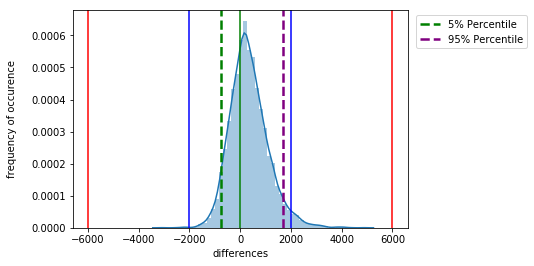

In [32]:
sns.distplot(differences_dataframe.differences)
plt.axvline(x=differences_dataframe.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='g')
plt.axvline(x=differences_dataframe.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");
plt.axvline(x=0, label="0", c='g')
plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='b')
plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='b')

In [ ]:
np.mean(abs(differences_dataframe.differences))